<a href="https://colab.research.google.com/github/mzs0153/ELEC-7970-Reinforcement-Learning/blob/main/Tensorflow_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2 Tutorial

We will write codes on Tensorflow 2 in this tutorial. If you want to run any code compatible with TensorFlow 1, you may find some coding examples here, https://github.com/tensorflow/docs/tree/master/site/en/r1. 

We will cover some basic functionality of TensorFlow 2. If you want to explore further, you can find coding help here, https://www.tensorflow.org/guide. This tutorial is adapted from TensorFlow guide: https://www.tensorflow.org/guide. 

This tutorial will provide a brief overview of the core concepts and functionality of Keras on the top of TensorFlow 2. Keras is the official high-level API of TensorFlow. There are three ways to create a Keras model with TensorFlow. They are: \
(a) Using sequential API.\
(b) Using Functional API.\
(c) Creating customized layer \

This tutorial will cover the following:
1. How to create a neural network model using Keras sequential API.
2. How to create a neural network model using Keras functional API. 
3. How to train, evaluate, and infer with neural network models. 
4. How to save and load neural network models. 
5. How to create customized neural network model using Keras and perform customized training.

**Installation guide:** No install necessary to run the TensorFlow directly in the browser with Colaboratory. To run TensorFlow on other platforms, you may need to install. You can find the installation guide here, https://www.tensorflow.org/install.


---




# Import Required Python Libraries

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Check the version of TensorFlow
print(tf.__version__)

2.3.0




---



# 1. Keras Sequential Model

A [Keras Sequential model](https://www.tensorflow.org/guide/keras/sequential_model) is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. You can find the definition of tensor here, https://en.wikipedia.org/wiki/Tensor.

In this section, will create a neural network with 4 layers that are connected in sequence:

   Input Layer

-> Dense Layer 2 hidden nodes Relu activation

-> Dense Layer 3 hidden nodes Relu activation

-> Dense Layer 4 nodes Output 

We create a squential model using Keras sequential constructor

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

You can also create an equivalent Sequential model incrementally via the `keras.Sequential().add()` method:

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

Also note that the Sequential constructor accepts a name argument:

In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="Output"))

Till now, we did not specify the input shape. Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights. So when you create a layer like this, initially, it has no weights.

In [ ]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

Its weights are created at the first time the model is called on an input. The shape of the weights depends on the shape of the input:

In [ ]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_6/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.9140491 ,  0.20731795,  0.33607507],
        [ 0.6031678 , -0.71878296,  0.05693799],
        [ 0.3689922 , -0.05298841, -0.8691015 ],
        [-0.31252927,  0.6698152 , -0.87393713]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

This principle also applies to Sequential models. When you instantiate a Sequential model without an input shape, it isn't "*built*": it has no weights and calling `layer.weights` results in an error. The weights are created when the model first sees some input data:

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
#model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6
model.weights

Number of weights after calling the model: 6


[<tf.Variable 'dense_10/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.46153975,  0.4544208 ],
        [-0.53859496, -0.08803511],
        [ 0.07010365,  0.26877928],
        [ 0.7486546 , -0.08078718]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_11/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.04993367,  0.48126078, -0.6588844 ],
        [-0.63908297, -0.5044551 ,  0.8055172 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_12/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.83002007,  0.19362426, -0.25414413,  0.6019441 ],
        [ 0.6247661 , -0.5091604 ,  0.07101852, -0.17300344],
        [-0.7778369 ,  0.19345593, -0.30095297, -0.79662436]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

Once a model is "*built*", you can call the `keras.Sequential().summary()` method to display its contents:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (1, 2)                    10        
_________________________________________________________________
dense_11 (Dense)             (1, 3)                    9         
_________________________________________________________________
dense_12 (Dense)             (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


We can start our model by passing an Input object to our model, so that the model knows its input shape from the start:

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2)                 10        
_________________________________________________________________
layer2 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer3 (Dense)               (None, 4)                 16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", input_shape=(4,)),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________




---


# 2. Keras Functional Model

The Keras functional API is a way to create models that are more flexible than the `tf.keras.Sequential` API. The [Keras functional API](https://www.tensorflow.org/guide/keras/functional) can handle models with 
non-linear topology, shared layers, and even multiple inputs or outputs.

Using functional API, at first we will create the same model that we have created using sequantial API. To build this model using the functional API, start by creating an input layer. You can create a new layer one by one by calling the output of existing model as the input of the new layer. 

In [ ]:
inputs = keras.Input(shape=(4,))
layer1 = layers.Dense(2, activation="relu")(inputs)
layer2 = layers.Dense(3, activation="relu")(layer1)
Outputs = layers.Dense(4, activation="relu")(layer2)

At this point, you can create a Model by specifying its inputs and outputs in the graph of layers.

In [ ]:
model = keras.Model(inputs=inputs, outputs=Outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


You can also plot the model as a graph.

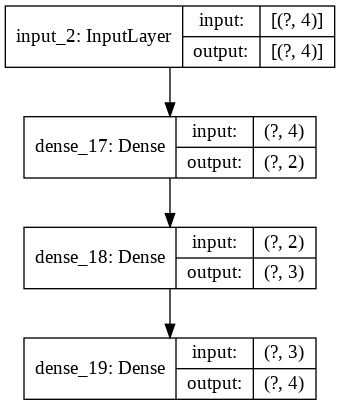

In [ ]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

Now, we will see an example to show the flexibility of Keras functional API.

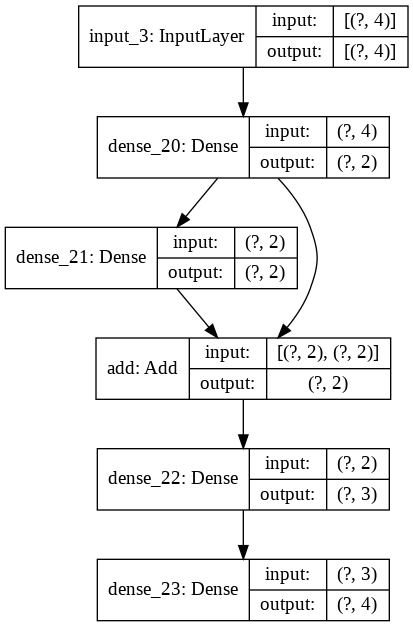

In [ ]:
input1 = keras.Input(shape=(4,))
layer1 = layers.Dense(2, activation="relu")(input1)
x= layers.Dense(2, activation="relu")(layer1)
y=layers.add([x, layer1])
layer2 = layers.Dense(3, activation="relu")(y)
Outputs = layers.Dense(4, activation="relu")(layer2)
model = keras.Model(inputs=input1, outputs=Outputs)
keras.utils.plot_model(model, "my_first_model1.png", show_shapes=True)




---


# 3. Training, evaluation, and inference

Training, evaluation, and inference work exactly in the same way for models built using the Sequential API and functional API.

Here, load the MNIST image data, reshape it into vectors, fit the model on the data (while monitoring performance on a validation split), then evaluate the model on the test data:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Check the input shape.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

Create the model, using one of the methods explained above.

In [ ]:
inputs = keras.Input(shape=(784,))
layer1 = layers.Dense(64, activation="relu")(inputs)
layer2 = layers.Dense(64, activation="relu")(layer1)
Outputs = layers.Dense(10, activation="relu")(layer2)

model = keras.Model(inputs=inputs, outputs=Outputs)
model.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Reshape input from (28, 28, ) to (784, ) 

In [ ]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

Compile the model. The objective of compiling the model is to specify the training configuration (optimizer, loss, metrics)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)


We call `fit()`, which will train the model by slicing the data into "batches" of size "batch_size", and repeatedly iterating over the entire dataset for a given number of "epochs".

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2617 - accuracy: 0.8937 - val_loss: 0.3343 - val_accuracy: 0.8790
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2578 - accuracy: 0.8946 - val_loss: 0.3411 - val_accuracy: 0.8768
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2552 - accuracy: 0.8951 - val_loss: 0.3406 - val_accuracy: 0.8766
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2521 - accuracy: 0.8960 - val_loss: 0.3427 - val_accuracy: 0.8782
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2493 - accuracy: 0.8962 - val_loss: 0.3511 - val_accuracy: 0.8773


750.0

Now, we will evaluate the trained model using function `evaluate()`

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.3187 - accuracy: 0.8806
Test loss: 0.3186963200569153
Test accuracy: 0.8805999755859375


In [ ]:
sample=100
input= x_test[sample:sample+1]
y_pred = model(input).numpy()
print(y_pred)

[[ 0.          0.          0.          0.          0.35056072  0.
  14.613229    0.          0.          0.        ]]


In [ ]:
Probability=tf.nn.softmax(y_pred).numpy()

In [ ]:
np.argmax(Probability)

6



---


# 4. Save and load a model
Nueral network models can be saved in the same way for the models built based on Sequential API and functional API. The standard way to save a functional model is to call `model.save()` to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

This saved file includes:

1. model architecture
2. model weight values (that were learned during training)
3. model training config, if any (as passed to compile)
4. optimizer and its state, if any (to restart training where you left off)

https://www.tensorflow.org/guide/keras/save_and_serialize/

In [ ]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model1 = keras.models.load_model("path_to_my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: path_to_my_model/assets


In [ ]:
model1.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________




---


# 5. Customized model and customized training 

First, we will create [customized Layer](https://www.tensorflow.org/guide/keras/custom_layers_and_models) class: the combination of state (weights) and some computation.
One of the central abstraction in Keras is the Layer class. A layer encapsulates both a state (the layer's "weights") and a transformation from inputs to outputs (a "call", the layer's forward pass).

Here's a densely connected layer. It has a state: the variables w and b.

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units):
        super(Linear, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=False
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


You would use a layer by calling it on some tensor input(s), much like a Python function.

In [ ]:
x = tf.ones((2, 2))
linear_layer = Linear(4)
y = linear_layer(x)
print(y)

tf.Tensor(
[[-0.02897494 -0.09011032 -0.01477186 -0.0339437 ]
 [-0.02897494 -0.09011032 -0.01477186 -0.0339437 ]], shape=(2, 4), dtype=float32)


Now, we will create the same Sequential model we have created previously using customized dense layer.

In [ ]:
x = tf.ones((1,4))
model = keras.Sequential(
    [
       Linear(2),
       Linear(3),
       Linear(4),
    ]
) 

y=model(x)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_4 (Linear)            (1, 2)                    10        
_________________________________________________________________
linear_5 (Linear)            (1, 3)                    9         
_________________________________________________________________
linear_6 (Linear)            (1, 4)                    16        
Total params: 35
Trainable params: 26
Non-trainable params: 9
_________________________________________________________________


In [ ]:
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [ ]:
print(linear_layer.weights)

# Customized Training

We can do a customized training using automatic differentiation method.  [Automatic differentiation in TensorFlow 2](https://www.tensorflow.org/guide/autodiff) uses GradientTape. GradientTape scope enables you to retrieve the gradients of the trainable weights of the layer with respect to a loss value. Using an optimizer instance, you can use these gradients to update these variables (which you can retrieve using `model.trainable_weights`).

Let's consider a simple MNIST model:

In [ ]:
inputs = keras.Input(shape=(784,), name="digits")
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(10, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

Let's train it using mini-batch gradient with a customized training loop.


First, we're going to need an optimizer, a loss function, and a dataset:

In [ ]:
# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

Here's our training loop:

We open a for loop that iterates over epochs
For each epoch, inside the loop we open another for loop that iterates over the dataset, in batches.

For each batch, we open a `GradientTape()` scope.
Inside this scope, we call the model (forward pass) and compute the loss. The operations that the model applies to the inputs are recorded on the `GradientTape()`.

We retrieve the gradients of the weights of the model with regard to the loss.
Finally, we use the optimizer to update the weights of the model based on the gradients

In [ ]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * 64))


Start of epoch 0
Training loss (for one batch) at step 0: 165.0483
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.6374
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.0146
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 1.0726
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 1.0475
Seen so far: 51264 samples

Start of epoch 1
Training loss (for one batch) at step 0: 0.9368
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.0054
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.4825
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.5813
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.9187
Seen so far: 51264 samples


We can also keep track of validation accuracy using validation dataset. We can reuse the built-in metrics (or customized ones) in such training loops written from scratch. Here's the flow:

1. Instantiate the metric at the start of the loop.
2. Call `metric.update_state()` after each batch.
3. Call `metric.result()` when you need to display the current value of the metric.
4. Call `metric.reset_states()` when you need to clear the state of the metric (typically at the end of an epoch).

Let's use this knowledge to compute `SparseCategoricalAccuracy()` on validation data at the end of each epoch:

In [ ]:
# Get model
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Instantiate an optimizer to train the model.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

# Prepare the training dataset.
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
# Reserve 10,000 samples for validation.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

Here's our training & evaluation loop:

In [ ]:
import time

epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * 64))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 86.2313
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.3832
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.4969
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 1.1331
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.6447
Seen so far: 51264 samples
Training acc over epoch: 0.6913
Validation acc: 0.8279
Time taken: 5.93s

Start of epoch 1
Training loss (for one batch) at step 0: 0.6376
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4635
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.4774
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.3190
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.4375
Seen so far: 51264 samples
Training acc over epoch: 0.8392
Validation acc: 0.8838
Time taken: 5.69s
